<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/GD%2C%20ID3%2C%20SVM%20-%20Project%202/CSCI6364_Project_2_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project 2**- Task 1 Linear Regression (15pts):

In this exercise, you will implement a linear regression model to predict the house price. For this
exercises use the dataset from the link below. Only use a single feature for you regression model and
explain your reasons for selecting that feature. Please explain the data setting and experimental setup
similar to Project 1.
The key components of your linear regression model are the cost function and gradient decent method
to update the weights.

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data


# 1. Task Setup and sample splitting

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')


In [7]:
#the data set is normalized to handle large featured dimensions
df_norm = (df - df.mean()) / df.std()

C:\Users\gimen\AppData\Local\Temp/ipykernel_22388/360126162.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_norm = (df - df.mean()) / df.std()


In [8]:
train, test = train_test_split(df_norm, test_size=0.2, random_state=69)

train, val = train_test_split(train, test_size=0.2, random_state=69)

#check the shape of the data
print(train.shape)
print(val.shape)
print(test.shape)

(13832, 21)
(3458, 21)
(4323, 21)


# 2. Feature selection

One feature will be selected based on the highest correlation among the variables to the target which is price.

In [9]:
#calculate and sort highest correlation wrt price
corr = train.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.696098
grade            0.663449
sqft_above       0.599814
sqft_living15    0.587558
bathrooms        0.512786
view             0.384801
bedrooms         0.321161
lat              0.318558
sqft_basement    0.311594
floors           0.268417
waterfront       0.254408
yr_renovated     0.115188
sqft_lot         0.085132
sqft_lot15       0.078625
yr_built         0.051809
condition        0.032224
long             0.020111
id              -0.014780
zipcode         -0.047377
Name: price, dtype: float64

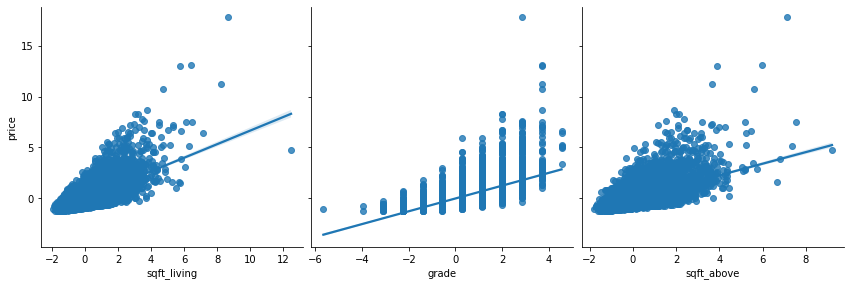

In [10]:
#for this task, i am selecting sqft_living as my primary feature
#pairplot of sqft_living, grade, sqft_above and price

sns.pairplot(train, x_vars=['sqft_living', 'grade', 'sqft_above'], y_vars='price', height=4, aspect=1, kind='reg')



It can be seen that price values are clustered close to each other on the lower half of our sqft_living samples and the price variance gets larger as sqft_living increases. This behavior is also observed in the grade dimension as well as the sqft_above_dimension.

#3. Implementing Gradient Descent 



task: minimize the cost function on each pass:

\begin{align} \mathbf{J_{cost}} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y} )^2.
\end{align}

---


to minimize the cost, weights will need to be updated by finding the gradient with respect to m and b.



In [11]:
X = train['sqft_living']
y = train['price']

#convert to numpy array
X = np.array(X)
y = np.array(y)

In [12]:
m = 0
c = 0
learning_rate = .01
n_iter = 5000
#mean squared error if y is a vector
def error_calc(X,y,m,c):
    error = 0
    n = len(X)
    for i in range(n):
        y_hat = m*X[i] + c
        error += (y_hat - y[i])**2
    return error/n
    

def calculate_gradient(X,y,m,c):
    n = len(X)
    c_grad = 0
    m_grad = 0
    for i in range(n):
        y_hat = m*X[i] + c
        c_grad += -2*(y[i] - y_hat)
        m_grad += -2*X[i]*(y[i] - y_hat)
    return c_grad/n, m_grad/n

#gradient descent
def gradient_descent(X, y, m, c, learning_rate, n_iter):
    
    errors = []
    
    
 
    for i in range(n_iter):  

        #calculate total error
        error = error_calc(X,y,m,c)
        if i % 100 == 0:
          print(f'on iter: {i} m:{m} c: {c} error {error}')
          errors.append(error)

        c_grad, m_grad = calculate_gradient(X,y,m,c)
        
        #update m and c
           
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad 
                         
    return m,c,errors



In [13]:
m, c, errors = gradient_descent(X, y, m, c, learning_rate, n_iter)

on iter: 0 m:0 c: 0 error 0.8859723280450884
on iter: 100 m:0.5717517862877474 c: -0.009737358062616304 error 0.46520789479908925
on iter: 200 m:0.6528726271773572 c: -0.009940936731296668 error 0.45674097853803947
on iter: 300 m:0.6643843924412162 c: -0.009813583704232678 error 0.4565704648051404
on iter: 400 m:0.6660183111079836 c: -0.00977478833466349 error 0.4565670284564827
on iter: 500 m:0.6662502602482105 c: -0.009766533840132052 error 0.45656695916178874
on iter: 600 m:0.6662831926980018 c: -0.00976499768062736 error 0.45656695776370776
on iter: 700 m:0.666287869184301 c: -0.009764731273170495 error 0.4565669577354864
on iter: 800 m:0.6662885333483376 c: -0.009764687040620609 error 0.456566957734918
on iter: 900 m:0.6662886276864282 c: -0.009764679910197832 error 0.45656695773490497
on iter: 1000 m:0.6662886410878561 c: -0.009764678784968691 error 0.4565669577349047
on iter: 1100 m:0.6662886429918424 c: -0.009764678610226956 error 0.4565669577349039
on iter: 1200 m:0.6662886432

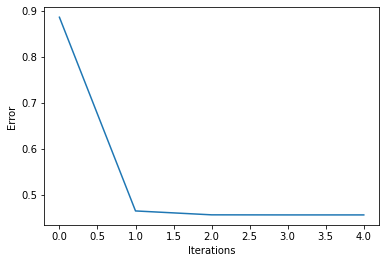

In [14]:
#plot the errors. It can be seen that the process converges before the first 100 epoch
import matplotlib.pyplot as plt
plt.plot(errors[:5])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

### 4. Parameter tuning on learning rate, iter, and batch size


In [15]:
#train on validation set
X_val = val['sqft_living']
y_val = val['price']

#convert to numpy array
X_val = np.array(X_val)
y_val = np.array(y_val)

#calculate error on validation set
error_val = error_calc(X_val,y_val,m,c)

print(f'error on validation set: {error_val}')

error on validation set: 0.588641006799941


In [16]:
def mini_batch_gradient_descent(X, y, m, c, learning_rate, n_iter, batch_size):

    errors = []
    
    n = len(X)
    
    for i in range(n_iter):  

        #calculate total error
        error = error_calc(X,y,m,c)
        if i % 300 == 0:
          print(f'on iter: {i} m:{m} c: {c} error {error}')
          errors.append(error)

        #calculate the batch size
        batch_size = int(n/batch_size)      
        shuffled = np.random.permutation(n) 

        #loop through mini batch
        for i in range(0, n, batch_size):
            X_batch = X[shuffled[i:i+batch_size]]
            y_batch = y[shuffled[i:i+batch_size]]
            
            c_grad, m_grad = calculate_gradient(X_batch,y_batch,m,c)
        
            #update m and c
           
            m = m - learning_rate * m_grad
            c = c - learning_rate * c_grad 

    return m,c,errors 

In [17]:
m = 0
c = 0
learning_rate = .001
n_iter = 5000
batch_size = 100
m, c, errors = mini_batch_gradient_descent(X, y, m, c, learning_rate, n_iter, batch_size)

on iter: 0 m:0 c: 0 error 0.8859723280450884
on iter: 300 m:0.6670652232902166 c: -0.00906438702408358 error 0.45656802383126005
on iter: 600 m:0.665471705667962 c: -0.00996104479669776 error 0.45656763937344996
on iter: 900 m:0.667076561030616 c: -0.009249698189844129 error 0.4565678176545765
on iter: 1200 m:0.668884487494211 c: -0.009517067955598695 error 0.4565735253010003
on iter: 1500 m:0.6662458411918348 c: -0.009960472877343711 error 0.4565669977276625
on iter: 1800 m:0.6663480932741289 c: -0.009847113598604872 error 0.45656696801417884
on iter: 2100 m:0.6653314422794705 c: -0.00985492865348305 error 0.4565678505613767
on iter: 2400 m:0.6654260478301243 c: -0.009903740866378491 error 0.4565676948435473
on iter: 2700 m:0.6671240187032144 c: -0.009703497615383947 error 0.4565676354977664
on iter: 3000 m:0.6659694846473061 c: -0.010044798475231901 error 0.4565671334716464
on iter: 3300 m:0.6661684165465026 c: -0.009108777300100259 error 0.4565674029886548
on iter: 3600 m:0.66633035

In [18]:
X_val = val['sqft_living']
y_val = val['price']

#convert to numpy array
X_val = np.array(X_val)
y_val = np.array(y_val)

#calculate error on validation set
error_val = error_calc(X_val,y_val,m,c)
print(error_val)

0.5887550005832572


### 5. Final evaluation on test set

In [19]:
#final evaluation on test set

X_test = test['sqft_living']
y_test = test['price']

#convert to numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
error_val = error_calc(X_test,y_test,m,c)
print(f'final evaluation error: {error_val}')

final evaluation error: 0.610700591769302


In [20]:
#final m and c values
print(f'final m : {m}, c: {c}')

final m : 0.6656131051363897, c: -0.009828790287640724


In [21]:
df[['sqft_living','price']].sort_values('sqft_living')[:10]

,sqft_living,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0
21332,390,245000.0
8623,410,325000.0
11500,420,229050.0
14466,420,280000.0
465,430,80000.0


In [22]:
#sanity check
m*380 + c

252.92315116154046

In [23]:
#sklearn implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train['sqft_living'].values.reshape(-1,1)
y = train['price'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

0.4565669577349047


In [25]:
print(reg.coef_)
print(reg.intercept_)

[[0.66628864]]
[-0.00976468]
